In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import torch
from matplotlib.ticker import MaxNLocator
from tqdm import tqdm

import os
import sys

# Set up path to import from src
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

# Import pokie from pokie.py
from pokie import pokie, pokie_bootstrap, get_device, pokie_with_convergence_estimate

# Num Runs

In [22]:
curr_num_runs = 100

# Data Set Up

In [23]:
# load in the .pt files in Downloads/samples
truth = torch.load('/Users/sammysharief/Downloads/samples/true.pt', map_location=torch.device('cpu'))
posterior4 = torch.load('/Users/sammysharief/Downloads/samples/posterior4.pt', map_location=torch.device('cpu'))
posterior3 = torch.load('/Users/sammysharief/Downloads/samples/posterior3.pt', map_location=torch.device('cpu'))
posterior2 = torch.load('/Users/sammysharief/Downloads/samples/posterior2.pt', map_location=torch.device('cpu'))
posterior1 = torch.load('/Users/sammysharief/Downloads/samples/posterior1.pt', map_location=torch.device('cpu'))
posterior0 = torch.load('/Users/sammysharief/Downloads/samples/posterior0.pt', map_location=torch.device('cpu'))
observations = torch.load('/Users/sammysharief/Downloads/samples/observations.pt', map_location=torch.device('cpu'))

# Load Data and Normalize

In [24]:
x_obs = truth
y_obs = observations
post_samp0 = posterior0
post_samp1 = posterior1
post_samp2 = posterior2
post_samp3 = posterior3

# Find max and min for truth, posterior4, posterior3, posterior2, posterior1, posterior0, observations
truth_max = torch.max(truth)
truth_min = torch.min(truth)

posterior4_max = torch.max(posterior4)
posterior4_min = torch.min(posterior4)

posterior3_max = torch.max(posterior3)
posterior3_min = torch.min(posterior3)

posterior2_max = torch.max(posterior2)
posterior2_min = torch.min(posterior2)

posterior1_max = torch.max(posterior1)
posterior1_min = torch.min(posterior1)

posterior0_max = torch.max(posterior0)
posterior0_min = torch.min(posterior0)

observations_max = torch.max(observations)
observations_min = torch.min(observations)

# Identify the max and min of all the data
max_data = truth_max
min_data = truth_min

# Normalize the data based on max_data and min_data
truth = (truth - min_data) / (max_data - min_data)
posterior4 = (posterior4 - min_data) / (max_data - min_data + 1e-10)
posterior3 = (posterior3 - min_data) / (max_data - min_data + 1e-10)
posterior2 = (posterior2 - min_data) / (max_data - min_data + 1e-10)
posterior1 = (posterior1 - min_data) / (max_data - min_data + 1e-10)
posterior0 = (posterior0 - min_data) / (max_data - min_data + 1e-10)

print(f'Truth max: {torch.max(truth)} and min: {torch.min(truth)}')
print(f'Posterior4 max: {torch.max(posterior4)} and min: {torch.min(posterior4)}')
print(f'Posterior3 max: {torch.max(posterior3)} and min: {torch.min(posterior3)}')
print(f'Posterior2 max: {torch.max(posterior2)} and min: {torch.min(posterior2)}')
print(f'Posterior1 max: {torch.max(posterior1)} and min: {torch.min(posterior1)}')
print(f'Posterior0 max: {torch.max(posterior0)} and min: {torch.min(posterior0)}')

# Reshape the Truth 
truth = truth.reshape(16, 64 * 64 * 3)

# Reshape all posteriors from 16,3,64,64 to 16,64,3x64x64
posterior3_reshape = posterior3.reshape(16, 64, 64 * 64 * 3)
posterior2_reshape = posterior2.reshape(16, 64, 64 * 64 * 3)
posterior1_reshape = posterior1.reshape(16, 64, 64 * 64 * 3)
posterior0_reshape = posterior0.reshape(16, 64, 64 * 64 * 3)

# Make truth, posterior0, posterior1, posterior2, posterior3, posterior4, observations into numpy arrays
truth = truth.numpy()
posterior3_reshape = posterior3_reshape.numpy()
posterior2_reshape = posterior2_reshape.numpy()
posterior1_reshape = posterior1_reshape.numpy()
posterior0_reshape = posterior0_reshape.numpy()

Truth max: 1.0 and min: 0.0
Posterior4 max: 0.8527698516845703 and min: -0.010756193660199642
Posterior3 max: 0.771514356136322 and min: -0.006224202457815409
Posterior2 max: 0.6889628767967224 and min: -0.0005897657829336822
Posterior1 max: 1.0044115781784058 and min: -0.013637484982609749
Posterior0 max: 1.038083791732788 and min: -2.8896414733026177e-05


In [25]:
# Identify your device (CUDA > MPS > CPU)
device = get_device()
print("Using device:", device)

posterior = [posterior0_reshape, posterior1_reshape, posterior2_reshape, posterior3_reshape]

# Convert to torch Tensors on the chosen device
posterior   = torch.tensor(posterior, dtype=torch.float32, device=device)
truth = torch.tensor(truth,   dtype=torch.float32, device=device)

results, calibrated, n_over_N_vals = pokie(truth, posterior, num_runs=curr_num_runs)

# Convert results, calibrated, n_over_N_vals back to numpy arrays
results = results.cpu().numpy()
calibrated = calibrated.cpu().numpy()
n_over_N_vals = n_over_N_vals.cpu().numpy()

l_values = np.linspace(0, len(results) - 1, len(results))
l_values = np.array(l_values)

print('\Modes:', l_values)
print('Results:', results)
print('Calibrated:', calibrated)

Using device: mps


Pokie MC runs: 100%|██████████| 100/100 [00:01<00:00, 98.37it/s]


\Modes: [0. 1. 2. 3.]
Results: [0.28617573 0.25635064 0.23119257 0.22628106]
Calibrated: [0.6515137  0.5836133  0.52633786 0.51515627]


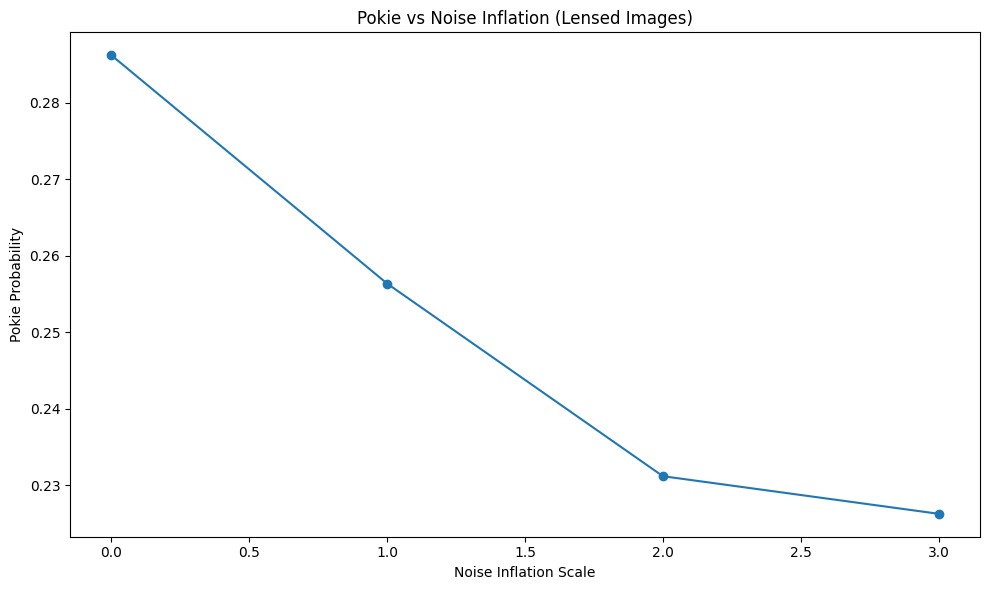

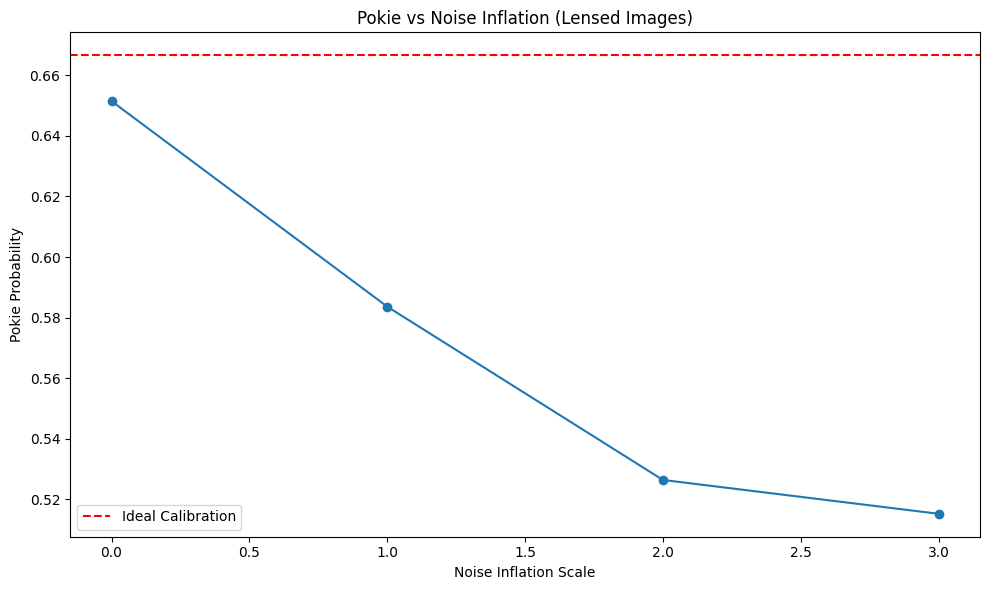

In [26]:
# Plot Pokie vs noise level
plt.figure(figsize=(10, 6))
plt.plot(l_values, results, marker='o')
plt.xlabel('Noise Inflation Scale')
plt.ylabel('Pokie Probability')
plt.title('Pokie vs Noise Inflation (Lensed Images)')
plt.tight_layout()
plt.savefig(f"../PLots/Lensed_Images/Num_Runs_{curr_num_runs}/Pokie_Lensed_Images_Num_Runs_{curr_num_runs}.pdf")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(l_values, calibrated, marker='o')
plt.xlabel('Noise Inflation Scale')
plt.ylabel('Pokie Probability')
plt.title('Pokie vs Noise Inflation (Lensed Images)')
plt.axhline(y=2/3, color='r', linestyle='--', label='Ideal Calibration')
plt.legend()
plt.tight_layout()
plt.savefig(f"../PLots/Lensed_Images/Num_Runs_{curr_num_runs}/Pokie_Lensed_Images_Calibrated_Num_Runs_{curr_num_runs}.pdf")
plt.show()

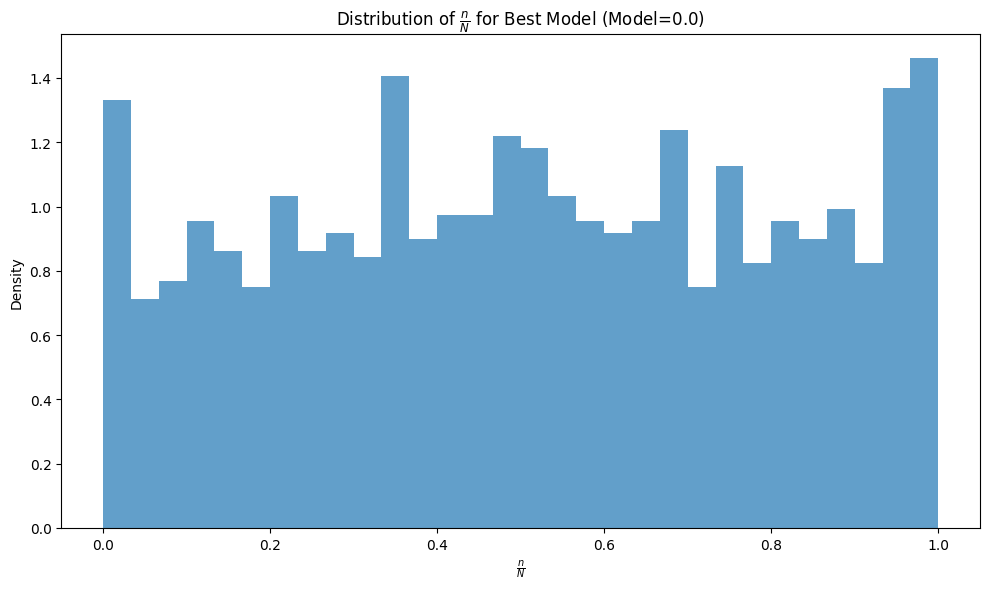

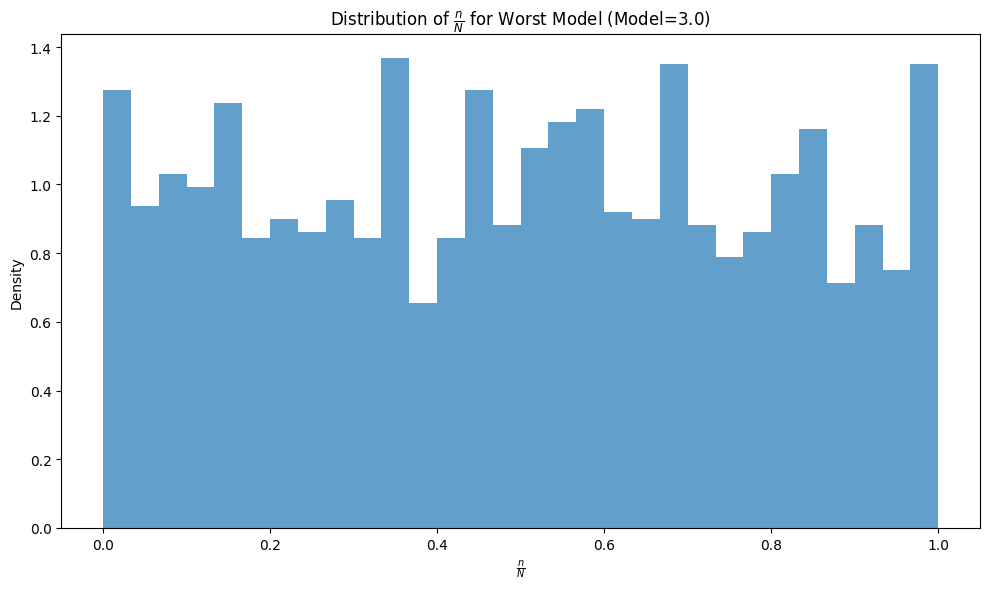

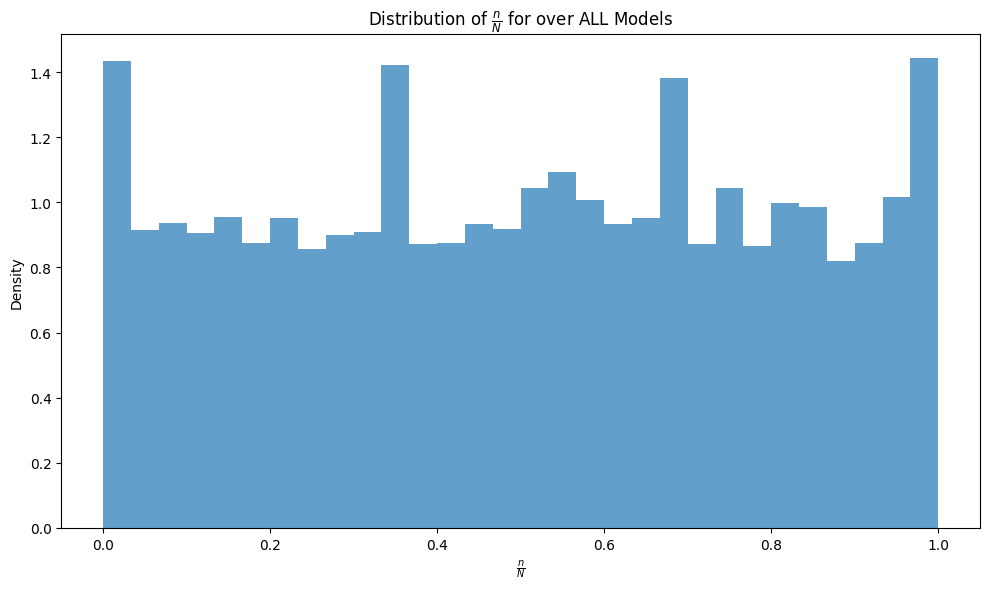

In [27]:
# Identify the best model
best_model_idx = np.argmax(results)

# Extract its n/N values across all runs and all truths, then flatten
# n_over_N_vals has shape (n_runs, n_models, n_truths)
best_vals = n_over_N_vals[:, best_model_idx, :].reshape(-1)

# Plot the distribution of n/N values for the best model
plt.figure(figsize=(10, 6))
plt.hist(best_vals, bins=30, density=True, alpha=0.7)
plt.title(rf"Distribution of $\frac{{n}}{{N}}$ for Best Model (Model={l_values[best_model_idx]})")
plt.xlabel(r"$\frac{n}{N}$")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig(f"../PLots/Lensed_Images/Num_Runs_{curr_num_runs}/Pokie_Best_Model_n_over_N_Lensed_Images_Num_Runs_{curr_num_runs}.pdf")
plt.show()

# Identify the Worst Model
worst_model_idx = np.argmin(results)

# Extract its n/N values across all runs and all truths, then flatten
# n_over_N_vals has shape (n_runs, n_models, n_truths)
worst_vals = n_over_N_vals[:, worst_model_idx, :].reshape(-1)

# Plot the distribution of n/N values for the worst model
plt.figure(figsize=(10, 6))
plt.hist(worst_vals, bins=30, density=True, alpha=0.7)
plt.title(rf"Distribution of $\frac{{n}}{{N}}$ for Worst Model (Model={l_values[worst_model_idx]})")
plt.xlabel(r"$\frac{n}{N}$")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig(f"../PLots/Lensed_Images/Num_Runs_{curr_num_runs}/Pokie_Worst_Model_n_over_N_Lensed_Images_Num_Runs_{curr_num_runs}.pdf")
plt.show()

# Concat all n/N values across all models
all_vals = n_over_N_vals.reshape(-1)

# Plot the distribution of n/N values for the worst model
plt.figure(figsize=(10, 6))
plt.hist(all_vals, bins=30, density=True, alpha=0.7)
plt.title(rf"Distribution of $\frac{{n}}{{N}}$ for over ALL Models")
plt.xlabel(r"$\frac{n}{N}$")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig(f"../PLots/Lensed_Images/Num_Runs_{curr_num_runs}/Pokie_n_over_N_Lensed_Images_Num_Runs_{curr_num_runs}.pdf")
plt.show()

In [28]:
# Identify your device (CUDA > MPS > CPU)
device = get_device()
print("Using device:", device)

out = pokie_with_convergence_estimate(truth, posterior, num_runs=curr_num_runs)

l_values = np.linspace(0, len(results) - 1, len(results))
l_values = np.array(l_values)

emperical_pokie = out['empirical_pokie'].cpu().numpy()
theoretical_pokie = out['theoretical_pokie'].cpu().numpy()
convergence_gap = out['convergence_gap'].cpu().numpy()
E_lambda = out['E_lambda'].cpu().numpy()
E_lambda_sq = out['E_lambda_sq'].cpu().numpy()
n_over_N_vals = out['n_over_N_vals'].cpu().numpy()

print('\Modes:', l_values)
print('Emperical Pokie:', emperical_pokie)
print('Theoretical Pokie:', theoretical_pokie)
print('Convergence Gap:', convergence_gap)

Using device: mps


Pokie MC runs: 100%|██████████| 100/100 [00:01<00:00, 73.05it/s]


\Modes: [0. 1. 2. 3.]
Emperical Pokie: [0.28911135 0.2527999  0.23064278 0.22744596]
Theoretical Pokie: [0.669354   0.66135645 0.6639853  0.65978265]
Convergence Gap: [0.01668799 0.09066308 0.1433115  0.14632559]


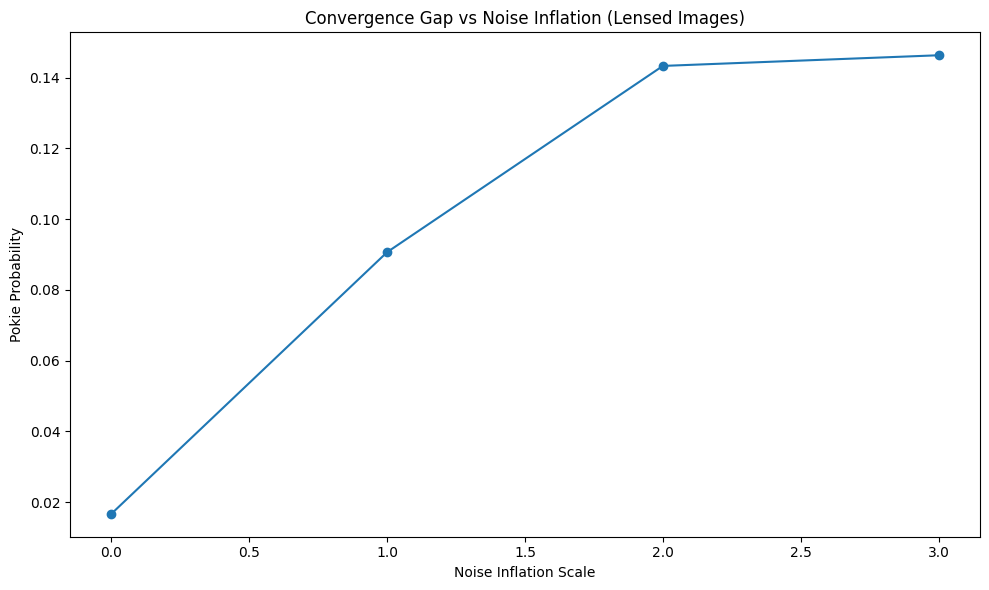

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(l_values, convergence_gap, marker='o')
plt.xlabel('Noise Inflation Scale')
plt.ylabel('Pokie Probability')
plt.title('Convergence Gap vs Noise Inflation (Lensed Images)')
plt.tight_layout()
plt.savefig(f"../PLots/Lensed_Images/Num_Runs_{curr_num_runs}/Pokie_Convergence_Gap_Lensed_Images_Num_Runs_{curr_num_runs}.pdf")
plt.show()

E[lambda]: 0.501676619052887
E[lambda^2]: 0.3390417993068695


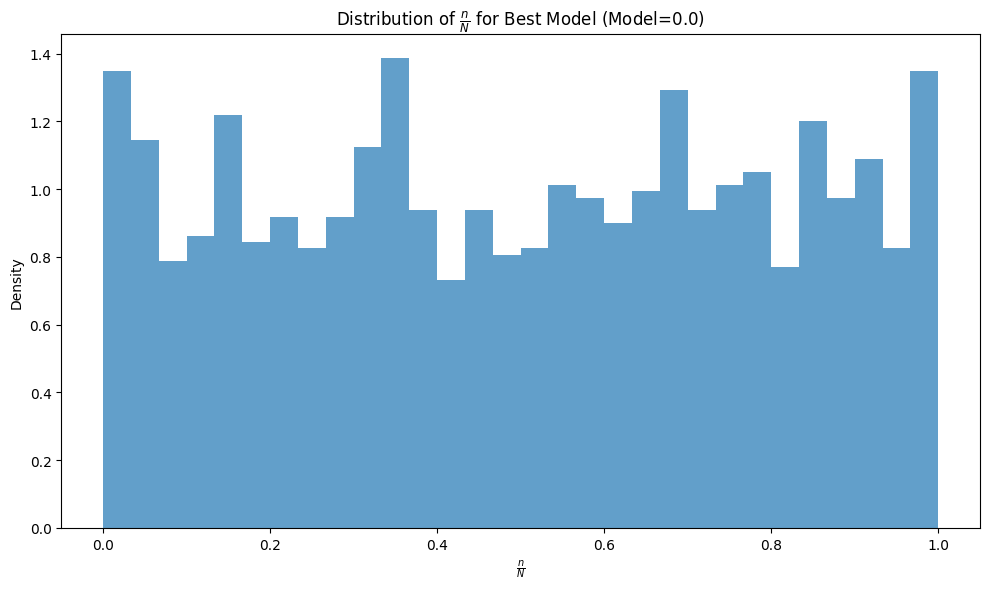

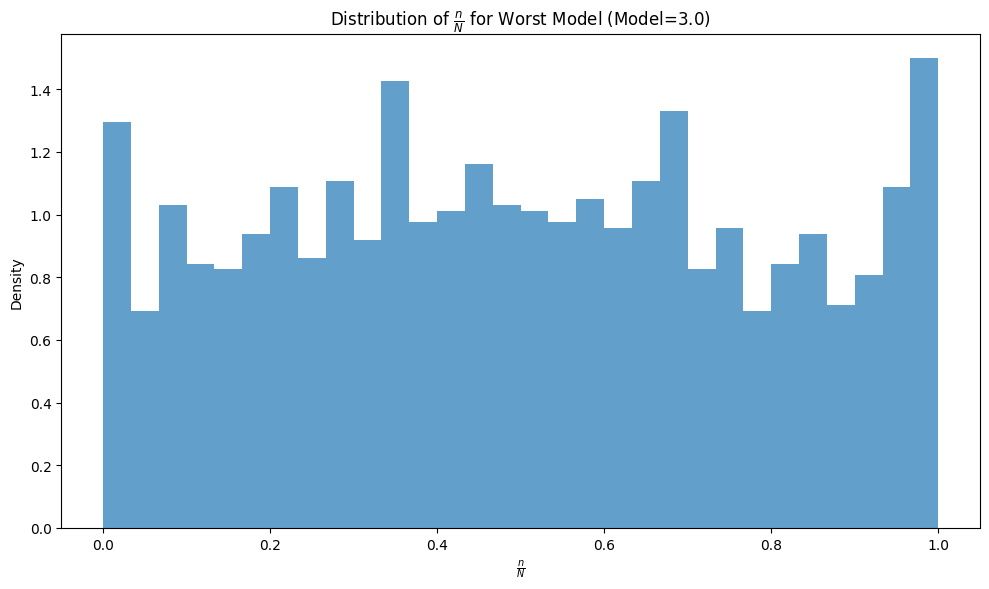

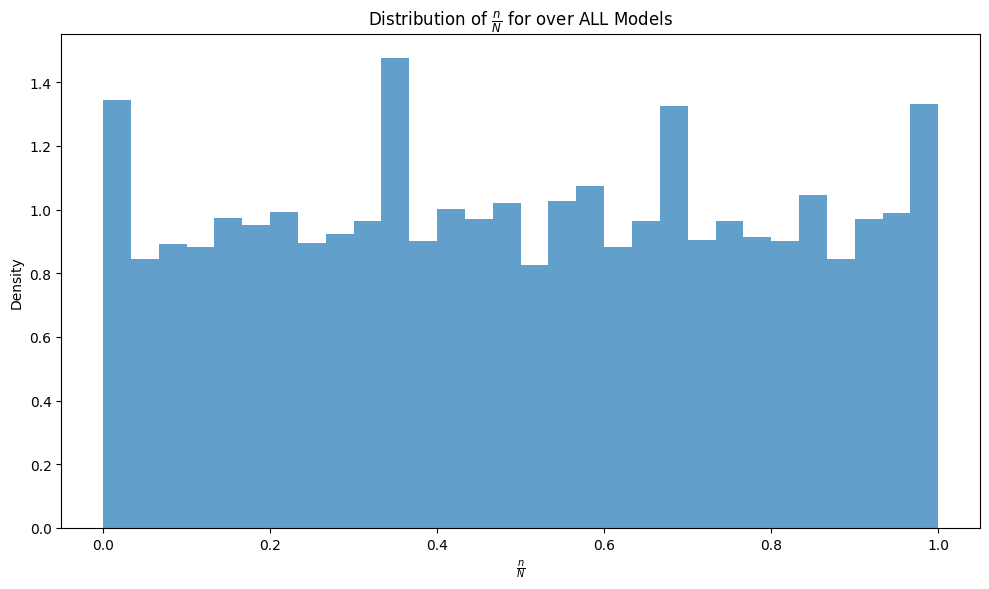

In [30]:
# Identify the best model
best_model_idx = np.argmin(convergence_gap)

# Extract its n/N values across all runs and all truths, then flatten
# n_over_N_vals has shape (n_runs, n_models, n_truths)
best_vals = n_over_N_vals[:, best_model_idx, :].reshape(-1)

print("E[lambda]:", out["E_lambda"][best_model_idx].item())
print("E[lambda^2]:", out["E_lambda_sq"][best_model_idx].item())

# Plot the distribution of n/N values for the best model
plt.figure(figsize=(10, 6))
plt.hist(best_vals, bins=30, density=True, alpha=0.7)
plt.title(rf"Distribution of $\frac{{n}}{{N}}$ for Best Model (Model={l_values[best_model_idx]})")
plt.xlabel(r"$\frac{n}{N}$")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig(f"../PLots/Lensed_Images/Num_Runs_{curr_num_runs}/Pokie_Convergence_Best_Model_n_over_N_Lensed_Images_Num_Runs_{curr_num_runs}.pdf")
plt.show()

# Identify the Worst Model
worst_model_idx = np.argmax(convergence_gap)

# Extract its n/N values across all runs and all truths, then flatten
# n_over_N_vals has shape (n_runs, n_models, n_truths)
worst_vals = n_over_N_vals[:, worst_model_idx, :].reshape(-1)

# Plot the distribution of n/N values for the worst model
plt.figure(figsize=(10, 6))
plt.hist(worst_vals, bins=30, density=True, alpha=0.7)
plt.title(rf"Distribution of $\frac{{n}}{{N}}$ for Worst Model (Model={l_values[worst_model_idx]})")
plt.xlabel(r"$\frac{n}{N}$")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig(f"../PLots/Lensed_Images/Num_Runs_{curr_num_runs}/Pokie_Convergence_Worst_Model_n_over_N_Lensed_Images_Num_Runs_{curr_num_runs}.pdf")
plt.show()

# Concat all n/N values across all models
all_vals = n_over_N_vals.reshape(-1)

# Plot the distribution of n/N values for the worst model
plt.figure(figsize=(10, 6))
plt.hist(all_vals, bins=30, density=True, alpha=0.7)
plt.title(rf"Distribution of $\frac{{n}}{{N}}$ for over ALL Models")
plt.xlabel(r"$\frac{n}{N}$")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig(f"../PLots/Lensed_Images/Num_Runs_{curr_num_runs}/Pokie_Convergence_n_over_N_Lensed_Images_Num_Runs_{curr_num_runs}.pdf")
plt.show()